**Let's Start**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import sklearn

**Upload Dataset**

**Importing of the dataset and slicing it into independent and dependent variables**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values


In [ ]:
print(dataset)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
dataset.shape

(400, 5)

In [ ]:
dataset.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

**We are performing a train test split on the dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 80)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Now we have to create and train the K Nearest Neighbor model with the training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = classifier.predict(X_test)


**Comparing true and predicted value :**

In [ ]:
print(y_pred)

[0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1]


In [ ]:
print(y_test)

[0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1]


**We can evaluate our model using the confusion matrix and accuracy score by comparing the predicted and actual test values**
 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Accuracy Score**

In [ ]:
print('Accuracy of model is:',accuracy_score(y_test,y_pred))

Accuracy of model is: 0.9


**Confusion Matrix**

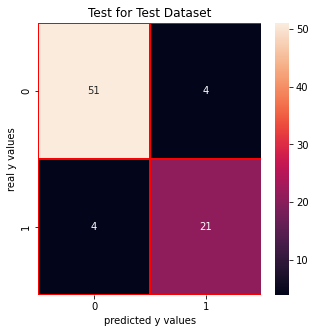

In [ ]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
#cmap='color'
#annot='Labels'
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

**Accuracy is 0.95**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        55
           1       0.84      0.84      0.84        25

    accuracy                           0.90        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.90      0.90      0.90        80



**AUC(ROC Curve)**

In [ ]:
from sklearn.metrics import roc_curve, auc


[0.         0.07272727 1.        ]
[0.   0.84 1.  ]
[2 1 0]


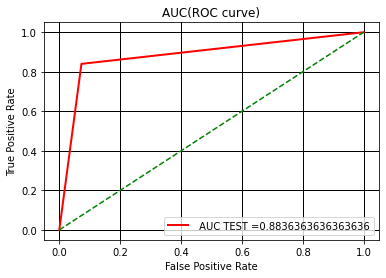

In [ ]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_pred)
print(test_fpr)
print(test_tpr)
print(te_thresholds)
plt.grid()
plt.plot(test_fpr, test_tpr,color='red', linestyle='-', linewidth=2, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()


## **Naive Bayes**

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)

[0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1]


In [ ]:
print(y_test)

[0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1]


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(ac)

0.9125


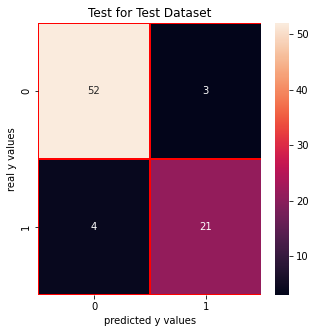

In [ ]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

[0.         0.05454545 1.        ]
[0.   0.84 1.  ]
[2 1 0]


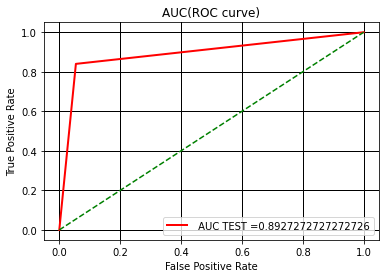

In [ ]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test,y_pred)
print(test_fpr)
print(test_tpr)
print(te_thresholds)
plt.grid()
plt.plot(test_fpr, test_tpr,color='red', linestyle='-', linewidth=2, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()